In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
import pandas as pd
import re
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
tqdm.pandas()

# I. Đọc dữ liệu

In [102]:
# đọc dữ liệu
df = pd.read_csv('/content/shopee.csv')
df.shape

(433, 22)

In [103]:
df.sample(5)

,link_image,link_product,product_name,price_origin,sale_price,rate,review_count,sale_count,like_count,fee_delivery,...,descibe,detail,Đánh giá,tỉ lệ phản hồi,tham gia,Sản phẩm,thời gian phản hồi,Người theo dõi,shop_name,shop_brand
299,https://down-vn.img.susercontent.com/file/vn-1...,https://shopee.vn/Hub-Type-C-3-trong-1-to-HDMI...,Hub Type C 3 trong 1 to HDMI 4K cho Macbook/iP...,₫240.000,₫139.000,4.9,703,"3,9k",Đã thích (607),₫0,...,Hub Type C 3 trong 1 to HDMI 4K-30Hz cho Macbo...,Danh MụcShopeeMáy Tính & LaptopPhụ Kiện Máy Tí...,"2,2k",98%,5 năm trước,20,trong vài giờ,"2,5k",Phụ Kiện Công Nghệ - MaxPro,Yêu thích+
398,https://down-vn.img.susercontent.com/file/vn-1...,https://shopee.vn/D%C3%A2y-M%E1%BA%A1ng-Cat6-B...,Dây Mạng Cat6 Bấm Sẵn 2 Đầu 10m 15m 20m 25m 30...,₫40.000 - ₫200.000,₫24.000 - ₫120.000,4.8,819,"3,9k",Đã thích (105),₫0 - ₫15.000,...,TỔNG KHO PHÂN PHỐI THIẾT BỊ MÁY TÍNH CAMERA gi...,Danh MụcShopeeMáy Tính & LaptopThiết Bị MạngCá...,"19,1k",37%,18 tháng trước,282,trong vài giờ,"1,3k",camera_official_store_vietnam,normal
49,https://down-vn.img.susercontent.com/file/vn-1...,https://shopee.vn/B%C3%A0n-ph%C3%ADm-c%C6%A1-m...,Bàn phím cơ máy tính để bàn laptop chơi game c...,₫399.000,₫255.000,4.8,3k,"8,9k",Đã thích (2k),₫0,...,"\nMô tả sản phẩm\ntay hoàn hảo, cảm giác mượt ...",Danh MụcShopeeMáy Tính & LaptopGamingBàn Phím ...,"12,8k",100%,29 tháng trước,54,trong vài giờ,"15,8k",Digital Mall,Yêu thích
124,https://down-vn.img.susercontent.com/file/vn-1...,https://shopee.vn/Chu%E1%BB%99t-kh%C3%B4ng-d%C...,Chuột không dây Logitech M220 Silent - giảm ồn...,₫350.000,₫269.000,4.9,"10,8k","35,8k",Đã thích (6k),₫0,...,Chuột không dây Logitech M220 Silent giảm ồn -...,Danh MụcShopeeMáy Tính & LaptopPhụ Kiện Máy Tí...,"147,4k",85%,6 năm trước,190,trong vài giờ,"443,3k",LOGITECH OFFICIAL SHOP,mall
127,https://down-vn.img.susercontent.com/file/vn-1...,https://shopee.vn/HUB-Type-C-v%C3%A0-HUB-USB-3...,HUB Type C và HUB USB 3.0 tốc độ cao KingDecor...,₫50.000,₫9.000,4.9,509,"1,9k",Đã thích (107),₫0 - ₫11.000,...,Shop King of Decor - Trang trí bàn làm việc -T...,Danh MụcShopeeMáy Tính & LaptopPhụ Kiện Máy Tí...,"8,5k",95%,3 năm trước,43,trong vài giờ,"14,4k",King Decor,Yêu thích+


In [90]:
# xoá các dòng bị trùng
df.drop_duplicates(inplace=True)
df.shape

(433, 22)

In [106]:
# xoá các dòng bị trống không cần thiết
df.dropna(subset=['sale_price'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(375, 22)

### `price`, `price_origin`

In [107]:
# kiểm tra nan
df[['price_origin', 'sale_price']].isna().sum()

price_origin    28
sale_price       0
dtype: int64

In [108]:
df[['price_origin', 'sale_price']].sample(5)

,price_origin,sale_price
34,₫1.590.000 - ₫4.680.000,₫1.298.000 - ₫3.968.000
227,₫80.000,₫39.000
160,₫150.000,₫79.000
77,₫40.000 - ₫148.000,₫20.000 - ₫79.000
348,₫59.999 - ₫66.875,₫39.000 - ₫48.000


> Những giá ban đầu bị trống `NaN` có nghĩa không có sale, cho bằng $0$

In [109]:
def process_price(x):
    x = str(x)
    x = x.split('-')[-1].strip()
    x = x.replace('.', '').replace('₫', '')
    return float(x)

In [110]:
df['price_origin'].fillna(0, inplace=True)
df['price_origin'] = df['price_origin'].apply(process_price)
df['sale_price'] = df['sale_price'].apply(process_price)

df_linear = df[['price_origin','sale_price']]
df_linear

,price_origin,sale_price
0,0.0,1000.0
1,301000.0,149000.0
2,0.0,920000.0
3,600000.0,370000.0
4,0.0,15000.0
...,...,...
370,1996000.0,998000.0
371,550000.0,529000.0
372,278000.0,166800.0
373,438000.0,262800.0


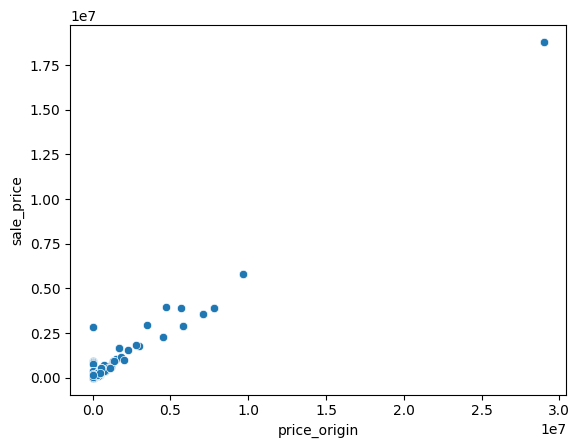

In [111]:
sns.scatterplot(x = df_linear['price_origin'], y = df_linear['sale_price']);

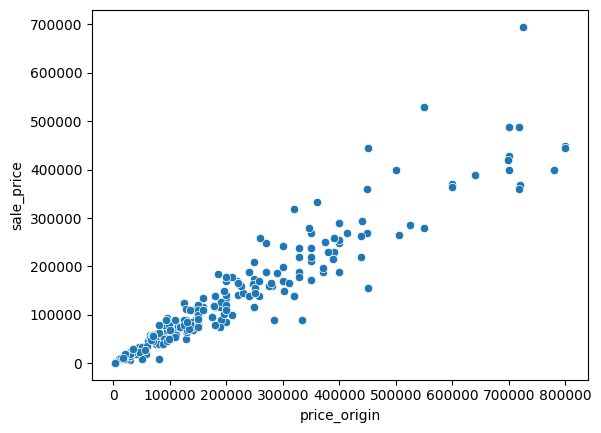

In [112]:
df_linear = df_linear[df_linear['price_origin'] < 1000000]
df_linear = df_linear[df_linear['price_origin'] > 0 ]

sns.scatterplot(x = df_linear['price_origin'], y = df_linear['sale_price']);
